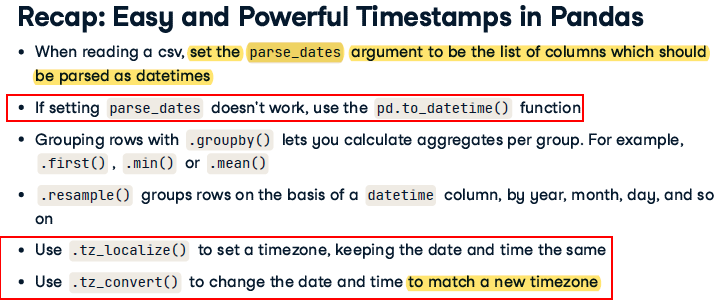

In [2]:
# Import W20529's rides in Q4 2017
# If we want Pandas to treat these columns as datetimes, we can make use 
# of the argument parse_dates in read_csv(), and set it to be a list of 
# column names, passed as strings.


import pandas as pd
rides = pd.read_csv('./Data/capital-onebike.csv',
parse_dates = ['Start date', 'End date'])
#print(rides.head())
print(rides['Start date'].iloc[2])

2017-10-02 06:37:10


In [17]:
rides['Start date'] = pd.to_datetime(rides['Start date'],
format = "%Y-%m-%d %H:%M:%S")
print(rides['Start date'].iloc[2])

2017-10-02 06:37:10


In [3]:
# Create a duration column
rides['Duration'] = rides['End date'] - rides['Start date']
# Print the first 5 rows
print(rides['Duration'].head(5))

0   0 days 00:03:01
1   0 days 02:07:02
2   0 days 00:05:43
3   0 days 00:21:18
4   0 days 00:21:17
Name: Duration, dtype: timedelta64[ns]


In [5]:
# Loading datetimes with parse_dates

rides['Duration'].dt.total_seconds().head(5)

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

# Summarizing datetime in Pandas

In [20]:
# Add duration (in seconds) column
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()
# Average duration per member type
rides.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [6]:
rides['Member type'].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

In [7]:
rides['Duration'].dt.total_seconds().min()

-3346.0